# **Python Ecosystem for Data Analysis: Sample Workflow (Code Preview)**

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


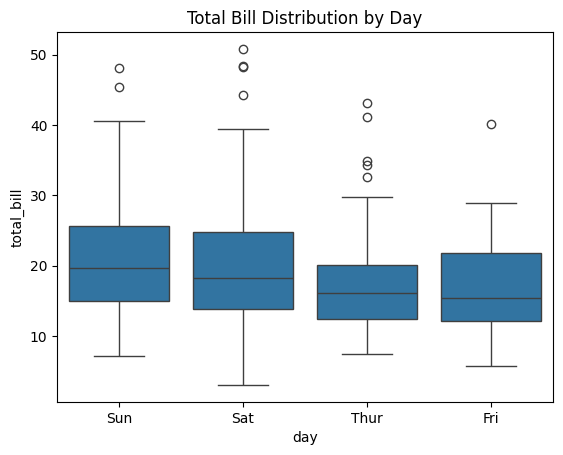

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

# Summary
print(df.describe()) #  # Shows count, mean, std deviation, min, max, etc.

# Create a boxplot to visualize total bill distribution across different days
sns.boxplot(x="day", y="total_bill", data=df)  # 'day' on x-axis, 'total_bill' on y-axis
plt.title("Total Bill Distribution by Day")    # Adds a title to the plot
plt.show()                              # Renders the plot

Boxplots are a powerful way to compare groups. For example, we can quickly see that bills tend to be higher on Sundays and Saturdays. This could help restaurant managers prepare staffing or discounts accordingly.

# **EDA Workflow**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load example dataset from seaborn
df = sns.load_dataset('tips')
print(df.head())
# Print a concise summary of the DataFrame
print(df.info())                         # Shows column names, data types, non-null counts

# Generate descriptive statistics for numeric columns
print(df.describe())                     # Includes mean, standard deviation, min, max, etc.

# Check for missing values in each column
print(df.isnull().sum())                 # Displays total missing values per column

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672


We can see that the average total bill is around 19.78, with a max of 50.81. That tells us something about the kind of restaurant this is—mid-range casual dining, perhaps. There are no missing values, so we're good to proceed with visualizations or modeling.

# **`Detecting Outliers`**

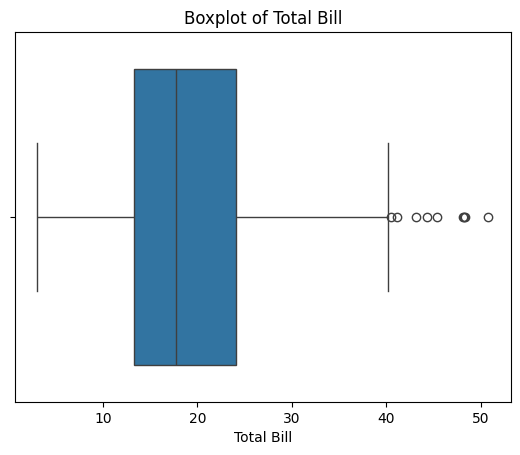

In [ ]:
# Boxplot (Best for spotting outliers clearly)
sns.boxplot(x=df['total_bill'])
plt.title("Boxplot of Total Bill")
plt.xlabel("Total Bill")
plt.show()


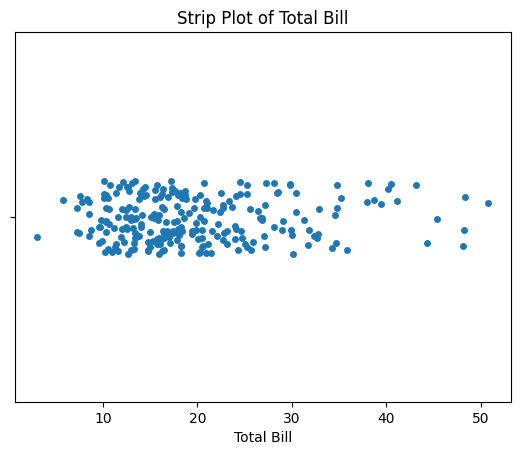

In [ ]:
# Strip Plot / Swarm Plot (Show all individual data points)
sns.stripplot(x=df['total_bill'], jitter=True)
plt.title("Strip Plot of Total Bill")
plt.xlabel("Total Bill")
plt.show()


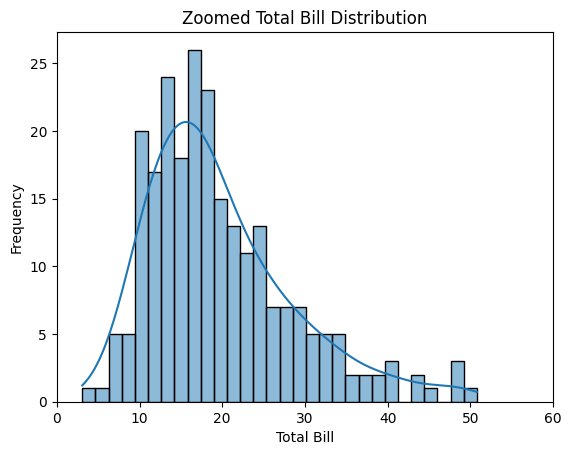

In [ ]:
# Histogram with Zoomed View
sns.histplot(df['total_bill'], kde=True, bins=30)
plt.xlim(0, 60)  # Adjust limit to include outliers
plt.title("Zoomed Total Bill Distribution")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Z-score or IQR Method (if you want programmatic detection)
from scipy import stats
import numpy as np

z_scores = stats.zscore(df['total_bill'])
outliers = df[np.abs(z_scores) > 3]
print("Outliers based on Z-score:\n", outliers)


Outliers based on Z-score:
      total_bill    tip   sex smoker  day    time  size
59        48.27   6.73  Male     No  Sat  Dinner     4
156       48.17   5.00  Male     No  Sun  Dinner     6
170       50.81  10.00  Male    Yes  Sat  Dinner     3
212       48.33   9.00  Male     No  Sat  Dinner     4


A Z-score tells us how far a data point is from the mean. If it’s more than 3 standard deviations away, it’s extremely rare and likely an outlier. This method assumes the data is normally distributed

In [ ]:
# using IQR method:
# IQR = Q3 - Q1 (the middle 50% of your data).
# Outliers lie below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.
# Works well even if the data isn't normally distributed.

Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['total_bill'] < Q1 - 1.5*IQR) | (df['total_bill'] > Q3 + 1.5*IQR)]
print(outliers)


     total_bill    tip     sex smoker   day    time  size
59        48.27   6.73    Male     No   Sat  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
184       40.55   3.00    Male    Yes   Sun  Dinner     2
197       43.11   5.00  Female    Yes  Thur   Lunch     4
212       48.33   9.00    Male     No   Sat  Dinner     4


The IQR method doesn’t assume any shape of distribution. It simply looks for values way outside the typical range. It’s robust and works well in practice.

# **Visualizing Distributions**

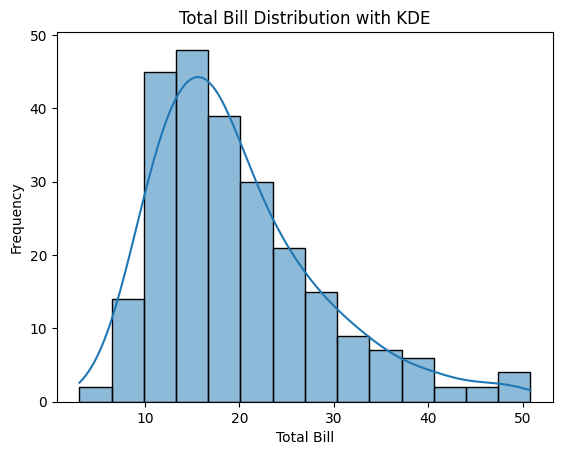

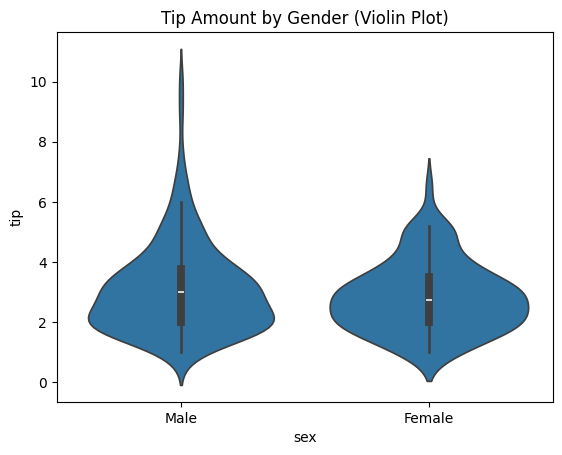

In [ ]:
# Histogram with KDE (Kernel Density Estimation)
sns.histplot(df['total_bill'], kde=True)
plt.title("Total Bill Distribution with KDE")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()

# Violin plot of tip by gender (easier to read than boxplot)
sns.violinplot(x='sex', y='tip', data=df)
plt.title("Tip Amount by Gender (Violin Plot)")
plt.show()

This plot tells us most people spent between 10 and 20. There's a smooth hump peaking around 13–15, meaning that's the most common range. The right tail stretches out, showing a few people spent much more — maybe large parties or special meals.

#**Pair Plot and Correlation**

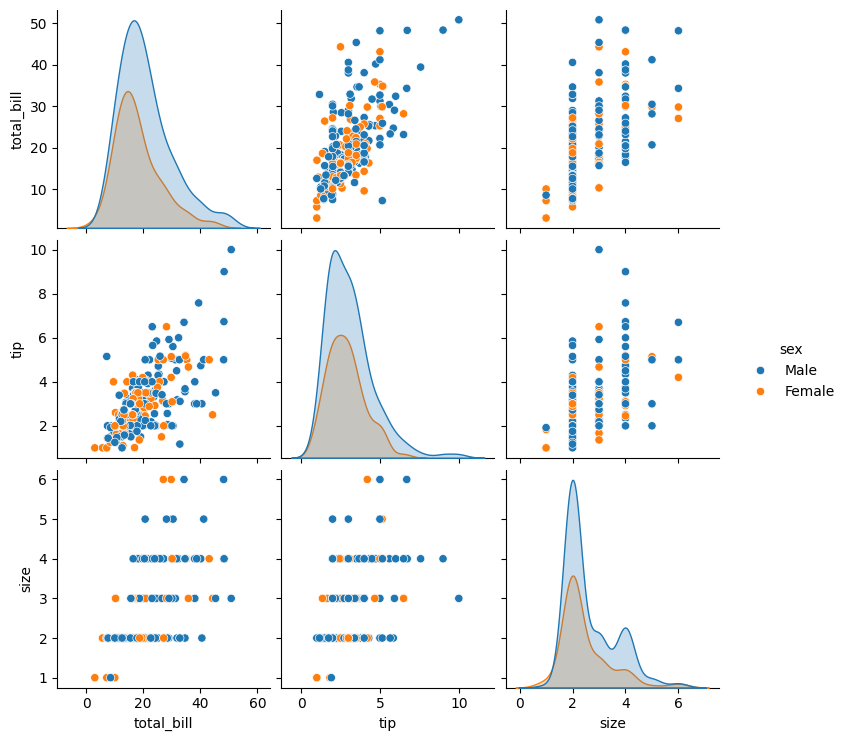

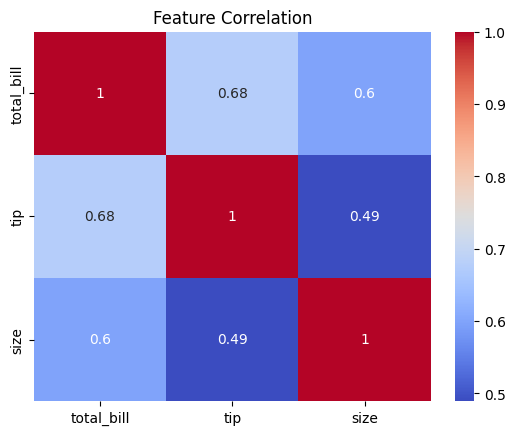

In [ ]:
# Pair Plot to observe relationships
sns.pairplot(df[['total_bill', 'tip', 'size', 'sex']], hue='sex')
plt.show()


# Correlation Heatmap
# Select only numeric features for correlation calculation
numeric_features = df.select_dtypes(include=['number'])
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

* Used the tips dataset (easy to understand restaurant bill data)

* Performed summary, missing value handling, and outlier detection

* Visualized distributions and relationships

* Built foundational insights for later ML tasks

# **Data Visualization Techniques**

**We'll continue using the Seaborn tips dataset, which contains: Total bill, tip, gender, day, time, party size**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = sns.load_dataset("tips")

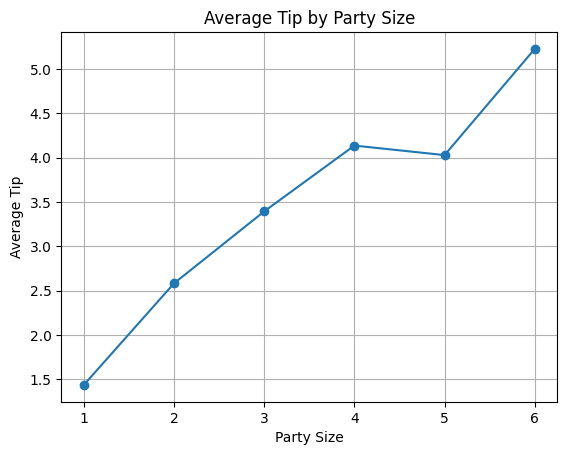

In [ ]:
# Line plot: average tip by party size
avg_tips = df.groupby("size")["tip"].mean().reset_index()
plt.plot(avg_tips['size'], avg_tips['tip'], marker='o')
plt.title("Average Tip by Party Size")
plt.xlabel("Party Size")
plt.ylabel("Average Tip")
plt.grid(True)
plt.show()

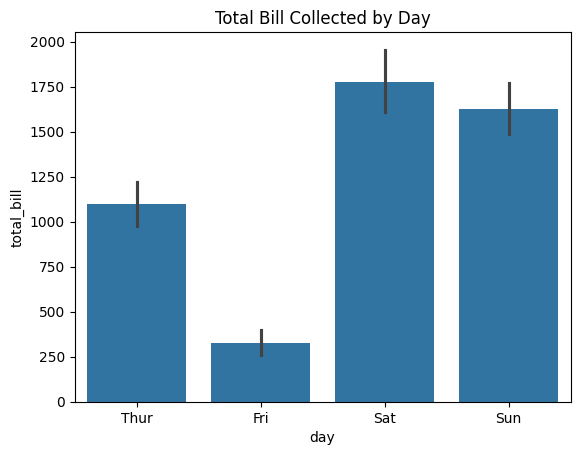

In [ ]:
# Bar chart: average total bill by day
sns.barplot(x="day", y="total_bill", data=df, estimator=sum)
plt.title("Total Bill Collected by Day")
plt.show()

<ipython-input-24-698fa1f21b8d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_sex = df.groupby("sex")["tip"].sum()


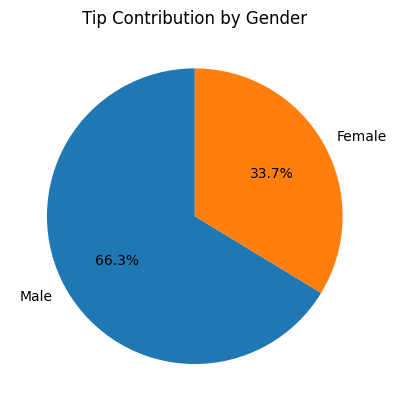

In [ ]:
# Pie chart: tip distribution by gender
tip_by_sex = df.groupby("sex")["tip"].sum()
tip_by_sex.plot.pie(autopct='%1.1f%%', startangle=90, labels=tip_by_sex.index)
plt.title("Tip Contribution by Gender")
plt.ylabel('')
plt.show()

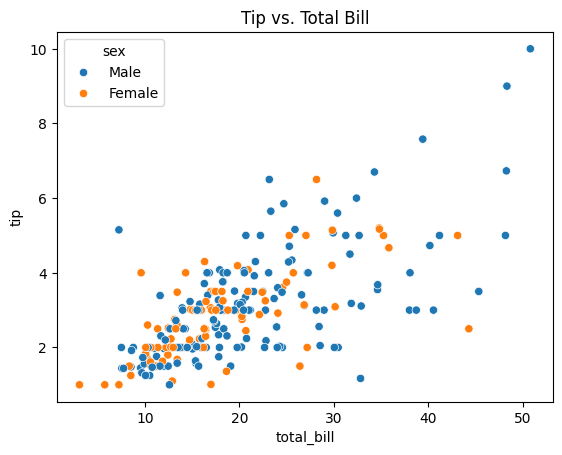

In [ ]:
# Scatter plot: total bill vs. tip
sns.scatterplot(x="total_bill", y="tip", hue="sex", data=df)
plt.title("Tip vs. Total Bill")
plt.show()

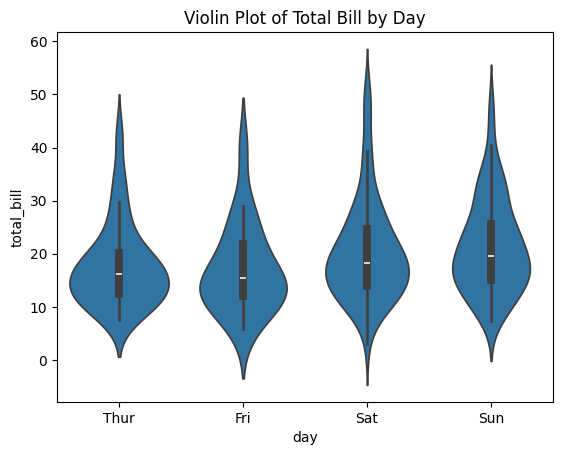

In [ ]:
# Violin Plot
sns.violinplot(x='day', y='total_bill', data=df)
plt.title("Violin Plot of Total Bill by Day")
plt.show()


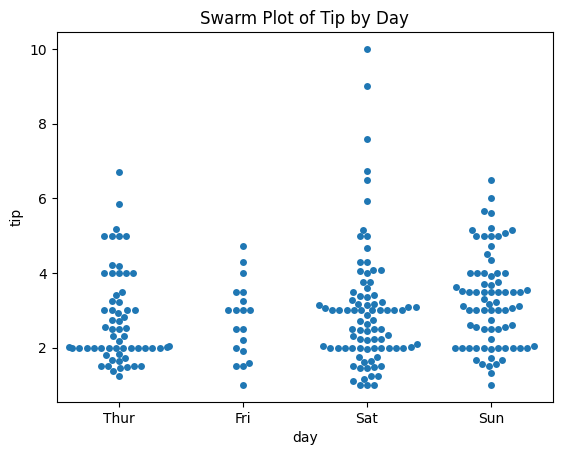

In [ ]:
# Swarm Plot
sns.swarmplot(x='day', y='tip', data=df)
plt.title("Swarm Plot of Tip by Day")
plt.show()

# Each point is shown without overlapping — great for spotting patterns.

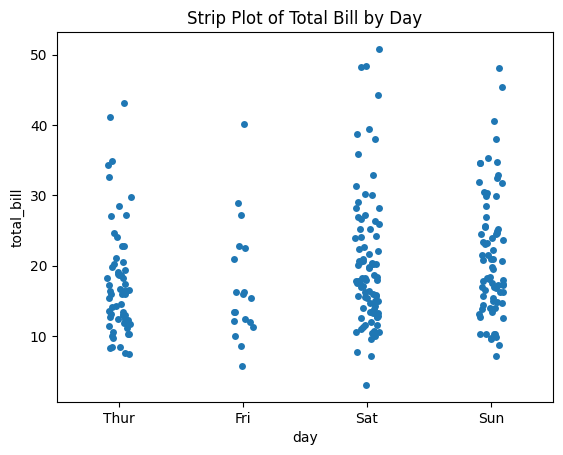

In [ ]:
# Strip Plot
sns.stripplot(x='day', y='total_bill', data=df, jitter=True)
plt.title("Strip Plot of Total Bill by Day")
plt.show()

# Like a swarm plot, but simpler and allows jitter for visibility.

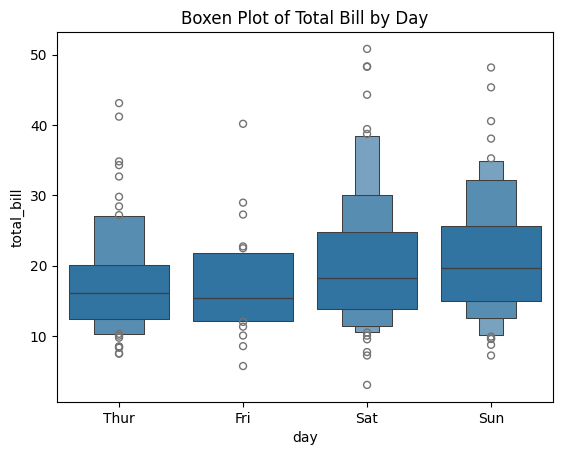

In [ ]:
# Boxen Plot (Great for Large Datasets)
sns.boxenplot(x='day', y='total_bill', data=df)
plt.title("Boxen Plot of Total Bill by Day")
plt.show()

# Like a boxplot, but better at showing distribution in heavy-tailed data.

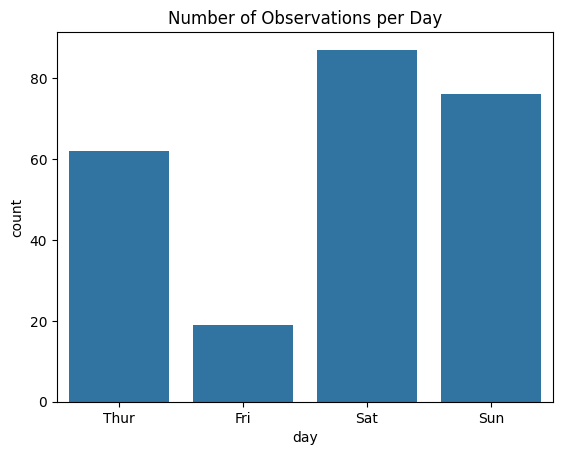

In [ ]:
# Count Plot
sns.countplot(x='day', data=df)
plt.title("Number of Observations per Day")
plt.show()

#Bar chart specifically designed to show counts of categories.

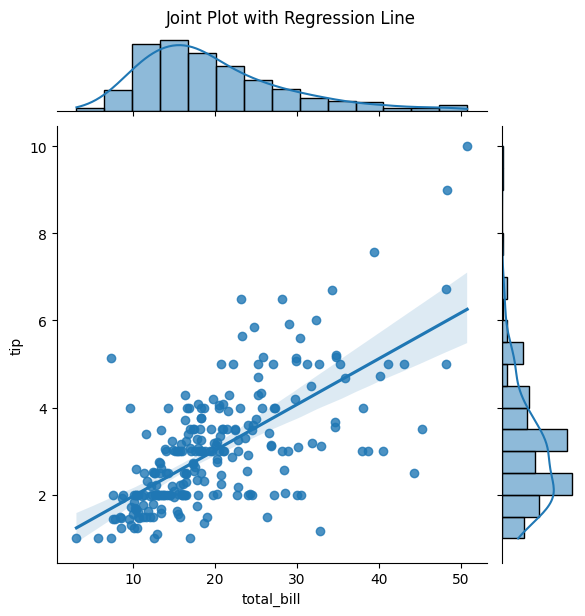

In [ ]:
# Joint Plot
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')
plt.suptitle("Joint Plot with Regression Line", y=1.02)
plt.show()

# Combines a scatterplot + histograms + correlation.

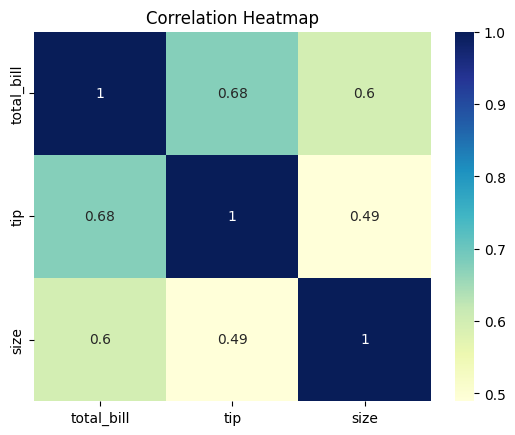

In [ ]:
# Correlation heatmap (only on numeric columns)
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

# **Extended Data Analysis and Visualization (Advanced EDA)**

Dataset for Demo – Iris Dataset
* The Iris dataset is a classic dataset for pattern
recognition.

* Contains 150 samples of flowers from 3 species: setosa, versicolor, virginica.

* Features: sepal length, sepal width, petal length, petal width.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris(as_frame=True)
df = iris.frame

In [ ]:
# Preview data
print(df.head())
print("\n Printing details:\n")
print(df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

 Printing details:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000

In [ ]:
# Map numerical target to species name
# Map numeric target values (0, 1, 2) to actual species names
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))
print(df[['target', 'species']].drop_duplicates())


     target     species
0         0      setosa
50        1  versicolor
100       2   virginica


4 numerical features, 1 categorical target (target)

Add species labels for better readability:

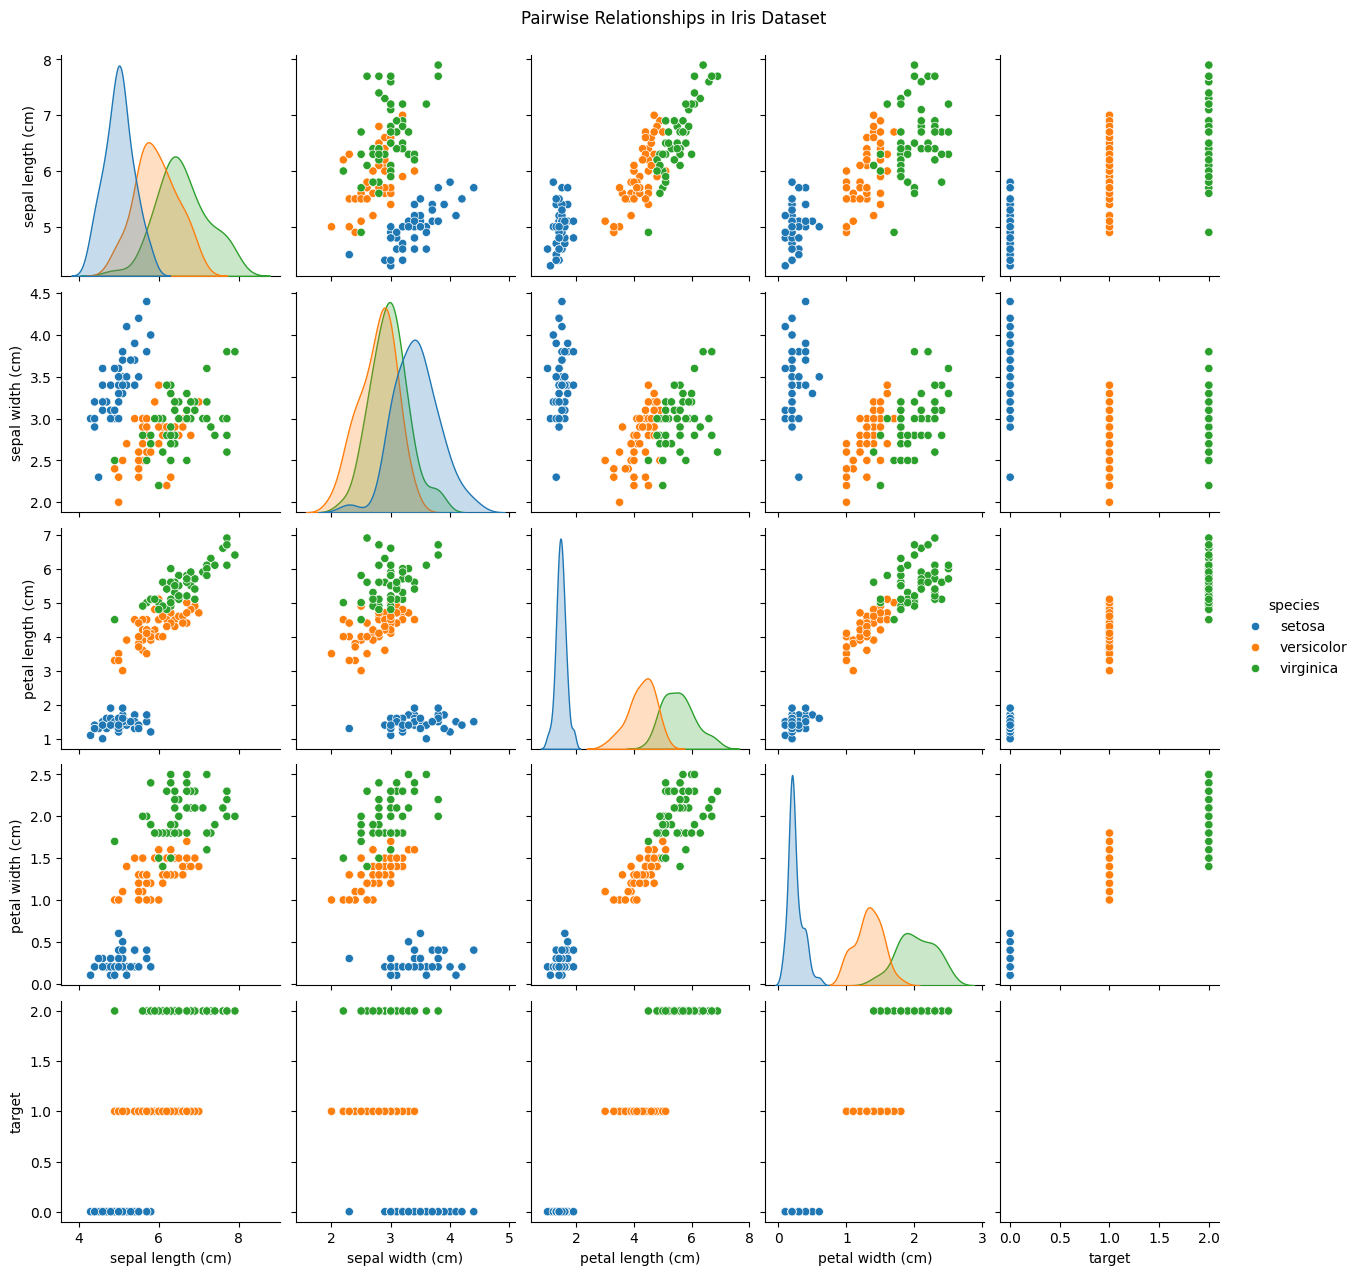

In [ ]:
# Pairplot to show feature relationships by species
sns.pairplot(df, hue="species")
plt.suptitle("Pairwise Relationships in Iris Dataset", y=1.02)
plt.show()

**Which features seem to do the best job of separating the species?**


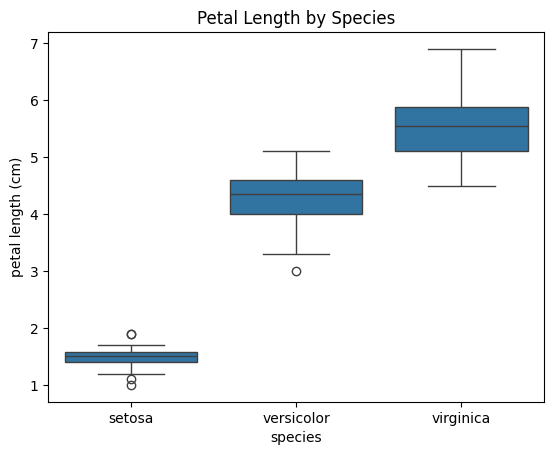

In [ ]:
# Boxplot of petal length by species
sns.boxplot(x="species", y="petal length (cm)", data=df)
plt.title("Petal Length by Species")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


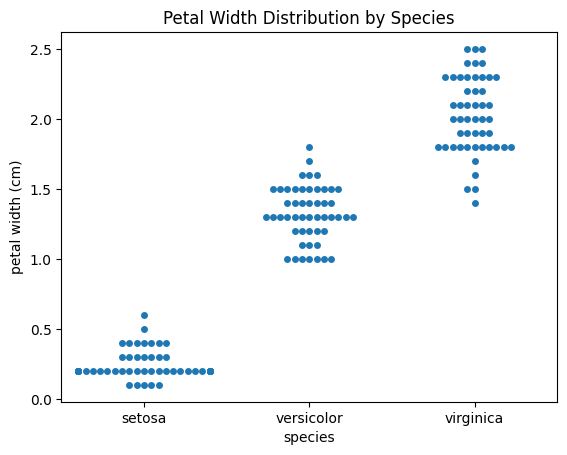

In [ ]:
# Swarmplot for petal width
sns.swarmplot(x="species", y="petal width (cm)", data=df)
plt.title("Petal Width Distribution by Species")
plt.show()

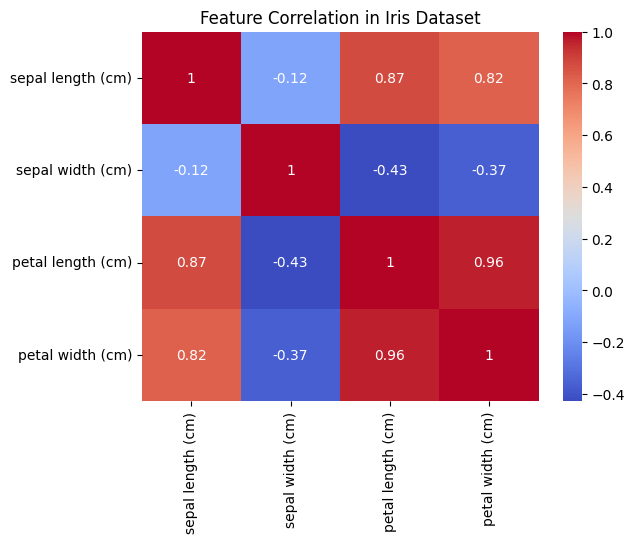

In [ ]:
# Correlation heatmap of numerical features
numeric_features = df.select_dtypes(include=['number']) # Select only numeric columns
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation in Iris Dataset")
plt.show()

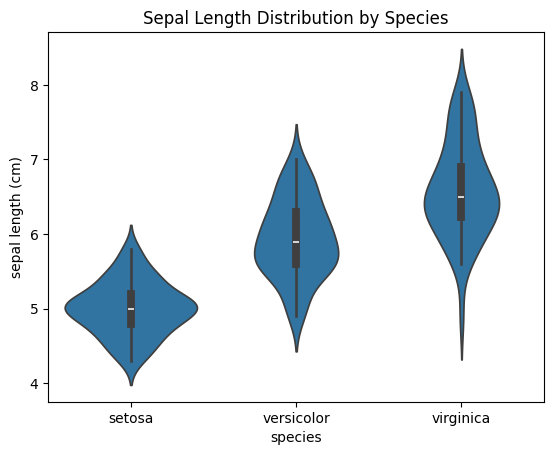

In [ ]:
# Violin plot to show sepal length distribution
sns.violinplot(x="species", y="sepal length (cm)", data=df)
plt.title("Sepal Length Distribution by Species")
plt.show()

In [ ]:
# interactive visualization using Plotly
import plotly.express as px
px.scatter(df, x="petal length (cm)", y="petal width (cm)", color="species", title="Petal Size by Species")

# This interactive plot shows how petal length and width vary across species. Notice how each species forms its own visual cluster.
# Hover to see exact values. Zoom, pan, and export the graph live.

Text(0.5, 1.0, 'Petal Length Distribution by Species')

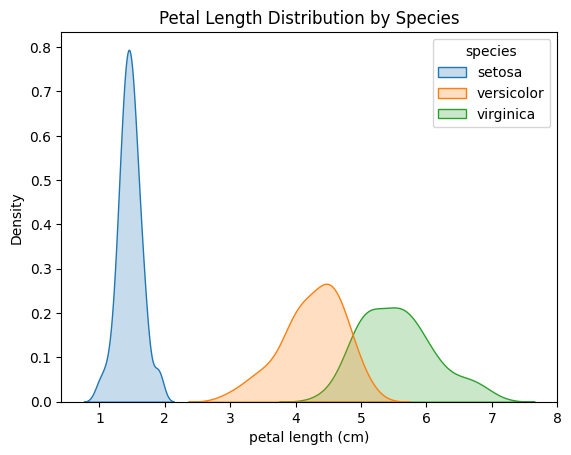

In [ ]:
# Create a KDE plot of petal length, separated by species

sns.kdeplot(data=df, x="petal length (cm)", hue="species", fill=True)
plt.title("Petal Length Distribution by Species")

#This plot shows the distribution of petal lengths for each species using smooth curves instead of bars. It helps us compare how these values differ across species.